In [2]:
import numpy as np
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

# Simulating a Driven Damped Pendulum
We'll be using dimensionless variables so that the natural frequency is equal to 1.

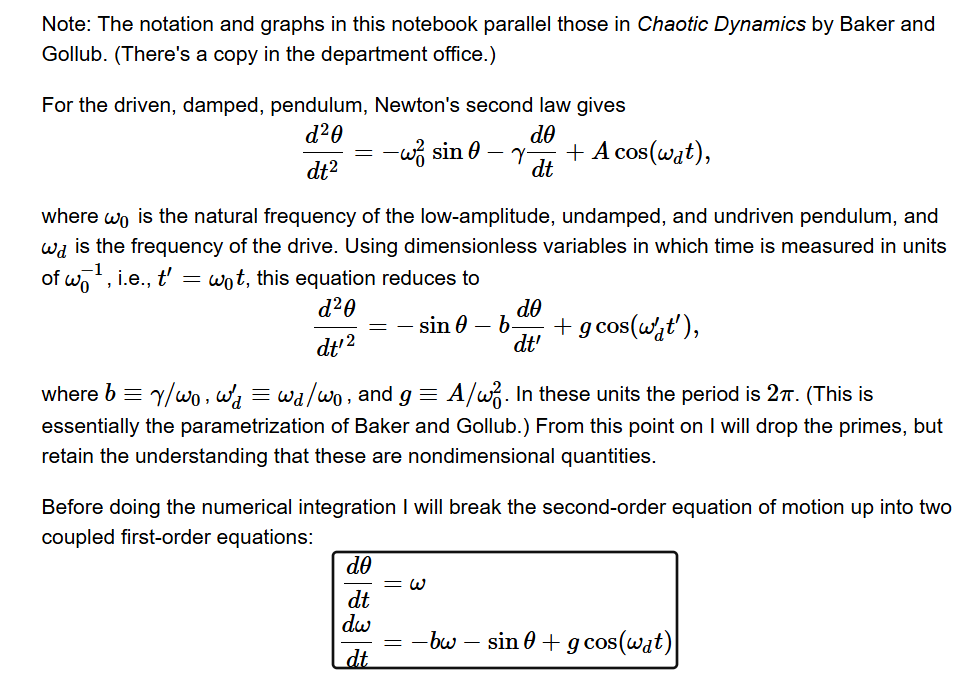

In [3]:
# 
def eom_dpp(t,state,b,g,omega_d):
    '''
    Function returning derivatives of the dependent quantities theta and omega for a driven damped pendulum
    theta: Pendulum angle from the vertical
    omega: angular velocity    
    b: damping parameter
    g: drive strength
    omega_d: drive frequency
    '''
    theta = state[0]
    omega = state[1]

    d_theta_dt = omega
    d_omega_dt = -b*omega - np.sin(theta) + g*np.cos(omega_d*t)
    return (d_theta_dt,d_omega_dt)

In [155]:
theta0 = 0.1       # Initial theta
omega0 = 0         # Initial angular velocity
state0 = np.array([theta0,omega0])# Combine initial conditions in array

b = 0.5         # Damping parameter
g = 1.07        # Driving amplitude
omega_d = 2/3     # Driving frequency

t_start = 0
t_end = 50*2*np.pi
t_eval = np.linspace(t_start,t_end,50*201)


In [156]:
sol = integrate.solve_ivp(eom_dpp,t_span = (t_start,t_end), y0=state0, 
                          t_eval=t_eval,atol=1e-16, rtol=1e-16,args=(b,g,omega_d))
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.126e-02 ...  3.141e+02  3.142e+02]
        y: [[ 1.000e-01  1.005e-01 ...  8.463e+00  8.458e+00]
            [ 0.000e+00  3.009e-02 ... -1.515e-01 -1.909e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 244868
     njev: 0
      nlu: 0


In [157]:
th = sol.y[0]
om = sol.y[1]
t = sol.t


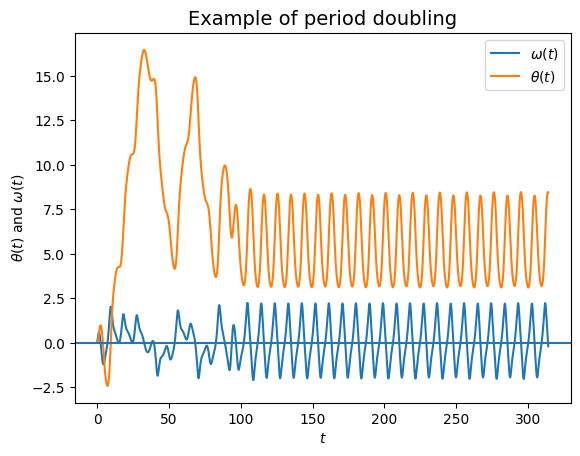

In [158]:
plt.figure(1)
plt.plot(t_eval,om, label='$\omega(t)$')
plt.plot(t,th, label = '$\\theta(t)$')
plt.axhline(0)
plt.title("Example of period doubling",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$ and $\omega(t)$"); # No idea why I need \\theta
plt.legend()

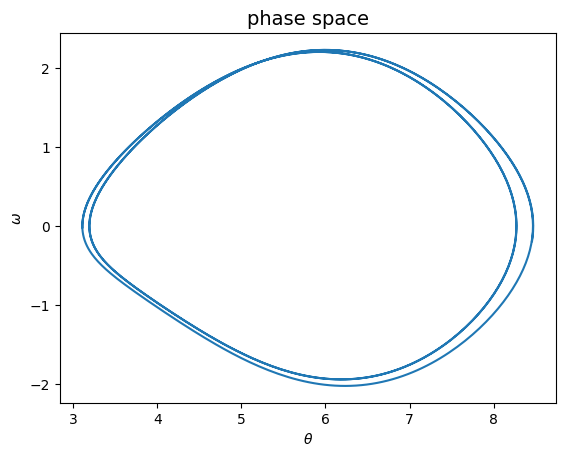

In [159]:
plt.figure(2)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 9000
plt.plot(th[tplot:],om[tplot:]);

In [7]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency

t = np.linspace(0,50*2.*np.pi,50*201)  # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

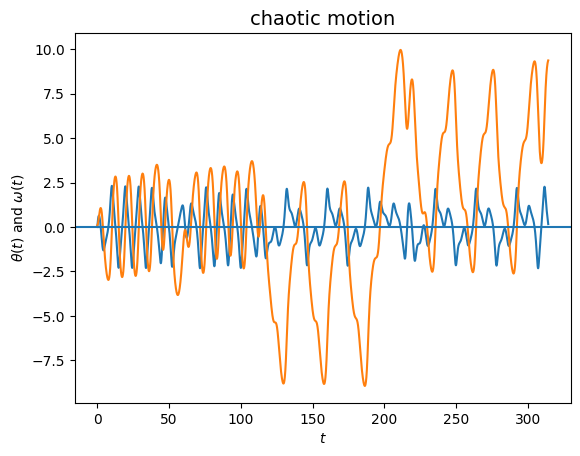

In [8]:
plt.figure(3)
plt.plot(t,om)
plt.plot(t,th)
plt.axhline(0)
plt.title("chaotic motion",fontsize=14)
plt.xlabel("$t$")
plt.ylabel("$\\theta(t)$ and $\omega(t)$"); # No idea why I need \\theta

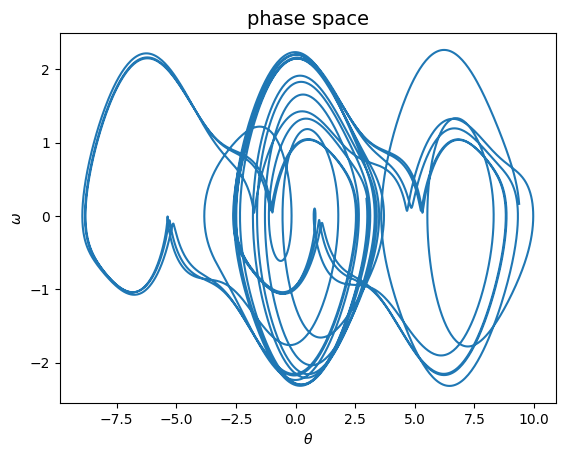

In [9]:
plt.figure(4)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("phase space",fontsize=14)
tplot = 1000
plt.plot(th[tplot:],om[tplot:]);

In [10]:
th0 = 0.1       # Initial theta
om0 = 0         # Initial angular velocity
u0 = np.array([th0,om0])# Combine initial conditions in array
b = 0.5         # Damping parameter
g = 1.15        # Driving amplitude
om_d = 2./3     # Driving frequency
t_d = 2*np.pi/om_d

t = np.linspace(0,1000*t_d, 10001)      # NOTE: The  points selected 
                                       # for plotting are not the 
                                       # points used for the numerical evalution.
th, om = integrate.odeint(eqs,u0,t,args=(b,g,om_d)).T

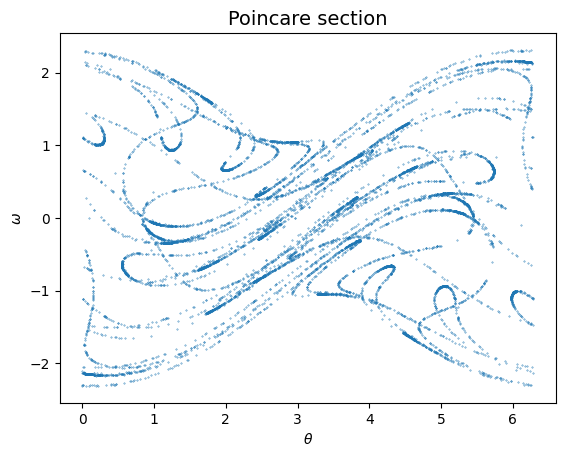

In [11]:
plt.figure(5)
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.title("Poincare section",fontsize=14)
plt.scatter(th%(2*np.pi),om,s=0.1);